In [29]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import json
from matplotlib.ticker import FuncFormatter, MultipleLocator
from joblib import load
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [30]:
def load_scores(modelfolder, name_convention):
    best_model = load(f'{modelfolder}{name_convention}_best_model.joblib')
    X_train = load(f'{modelfolder}{name_convention}_X_train.joblib')
    y_train = load(f'{modelfolder}{name_convention}_y_train.joblib')
    X_test = load(f'{modelfolder}{name_convention}_X_test.joblib')
    y_test = load(f'{modelfolder}{name_convention}_y_test.joblib')
    feature_cols = load(f'{modelfolder}{name_convention}_feature_col_lst.joblib')
    numerical_cols = load(f'{modelfolder}{name_convention}_numerical_col_lst.joblib')
    categorical_cols = load(f'{modelfolder}{name_convention}_categorical_col_lst.joblib')

    with open(f'{modelfolder}{name_convention}_kf_config.json', 'r') as f:
       kf_config_loaded = json.load(f)
    kf = KFold(**kf_config_loaded)

    train_sizes, train_scores, test_scores = learning_curve(    
            best_model, X_train, y_train, cv=kf,
            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='r2'
        )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    return train_sizes, train_scores_mean, test_scores_mean, train_scores_std, test_scores_std

In [9]:
lr_train_sizes, lr_train_scores_mean, lr_test_scores_mean, lr_train_scores_std, lr_test_scores_std = load_scores(
    modelfolder = r"PMF_Day_Breach_LR\\", 
    name_convention = "LR_PMF_Day_Breach_5CombinedIte"
    )

In [10]:
ml_train_sizes, ml_train_scores_mean, ml_test_scores_mean, ml_train_scores_std, ml_test_scores_std = load_scores(
    modelfolder = r"PMF_Day_Breach_HGBR\\", 
    name_convention = "HGBR_PMF_Day_Breach_5CombinedIte"
    )

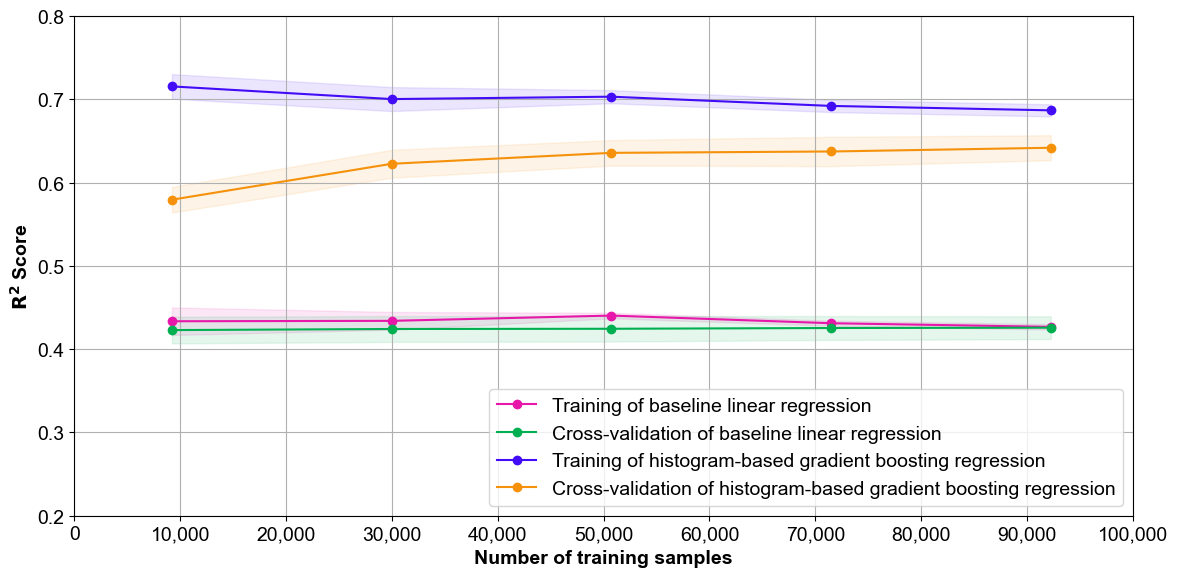

In [33]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

plt.figure(figsize=(12, 6))
plt.xlabel("Number of training samples", fontweight='bold')
plt.ylabel(r"$\mathbf{R^2}$ score", fontweight='bold')


# Plot Linear Regression learning curve
plt.fill_between(lr_train_sizes, lr_train_scores_mean - lr_train_scores_std,
                         lr_train_scores_mean + lr_train_scores_std, alpha=0.1, color="#E617A9")
plt.fill_between(lr_train_sizes, lr_test_scores_mean - lr_test_scores_std,
                         lr_test_scores_mean + lr_test_scores_std, alpha=0.1, color="#00B050")
plt.plot(lr_train_sizes, lr_train_scores_mean, 'o-', color="#E617A9", label="Training of baseline linear regression")
plt.plot(lr_train_sizes, lr_test_scores_mean, 'o-', color="#00B050", label="Cross-validation of baseline linear regression")

# Plot Linear Regression learning curve
plt.fill_between(ml_train_sizes, ml_train_scores_mean - ml_train_scores_std,
                         ml_train_scores_mean + ml_train_scores_std, alpha=0.1, color="#420CF7")
plt.fill_between(ml_train_sizes, ml_test_scores_mean - ml_test_scores_std,
                         ml_test_scores_mean + ml_test_scores_std, alpha=0.1, color="#F5910B")
plt.plot(ml_train_sizes, ml_train_scores_mean, 'o-', color="#420CF7", label="Training of histogram-based gradient boosting regression")
plt.plot(ml_train_sizes, ml_test_scores_mean, 'o-', color="#F5910B", label="Cross-validation of histogram-based gradient boosting regression")

plt.xlim([0,100000])

def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.xaxis.set_major_locator(MultipleLocator(10000))


plt.ylim([0.2,0.8])
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r'learning_curve_comparison.png', dpi=300)
